<a href="https://colab.research.google.com/github/josefernandezest98/training/blob/main/PySpark_Training/pyspark_training_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PySpark Training Notebook**

## Apache Spark Introduction

Spark is currently one of the most popular tools for big data analytics. Hadoop (another big data analytics tool) is a slightly older technology, although still in use by some companies. Spark is generally faster than Hadoop, which is why Spark has become more popular over the last few years.

There are many other big data tools and systems, each with its own use case. For example, there are database system like Apache Cassandra and SQL query engines like Presto. But Spark is still one of the most popular tools for analyzing large data sets.

**Why Spark?**

Spark is meant for big data sets that cannot fit on one computer. But you don't need Spark if you are working on smaller data sets. In the cases of data sets that can fit on your local computer, there are many other options out there you can use to manipulate data. For example:

* AWK: command line tool for manipulating text files.
* R: programming language and software environment for statistical computing.
* Python data libraries, which include Pandas, Matplotlib, NumPy, and scikit-learn among other libraries.

**Spark's limitations**

Spark Streaming’s latency is at least 500 milliseconds since it operates on micro-batches of records, instead of processing one record at a time. Native streaming tools such as Storm, Apex, or Flink can push down this latency value and might be more suitable for low-latency applications. Flink and Apex can be used for batch computation as well, so if you're already using them for stream processing, there's no need to add Spark to your stack of technologies.

Another limitation of Spark is its selection of machine learning algorithms. Currently, Spark only supports algorithms that scale linearly with the input data size. In general, deep learning is not available either, though there are many projects that integrate Spark with Tensorflow and other deep learning tools.

**The Spark Cluster**

When we talk about distributed computing, we generally refer to a big computational job executing across a cluster of nodes. Each node is responsible for a set of operations on a subset of the data. At the end, we combine these partial results to get the final answer. There are four different modes to setup Spark:

* Local mode: In this case, everything happens on a single machine. So, while we use spark's APIs, we don't really do any distributed computing. The local mode can be useful to learn syntax and to prototype your project.

The other three modes are distributed and declare a cluster manager. The cluster manager is a separate process that monitors available resources and makes sure that all machines are responsive during the job. There are three different options of cluster managers:

* Spark's own Standalone Customer Manager. In Spark's Standalone mode there is a Driver Process. If you open a Spark shell, either Python or Scala, you are directly interacting with the driver program. It acts as the master and is responsible for scheduling tasks
* YARN from the Hadoop project.
* Another open-source manager from UC Berkeley's AMPLab Coordinators.



## PySpark

**What is PySpark?**

PySpark is the Python API for Apache Spark, an open source, distributed computing framework and set of libraries for real-time, large-scale data processing. If you’re already familiar with Python and libraries such as Pandas, then PySpark is a good language to learn to create more scalable analyses and pipelines. PySpark gives you access to all the important Spark data constructs like:

* RDDs.
* DataFrames.
* Spark SQL.

That means you can write Spark code that runs in either a Spark Cluster, in a Jupyter Notebook, or on your laptop. When you write code on your Jupyter Notebook or a laptop, Spark creates a temporary Spark node that runs locally. Because Spark uses Java, it is necessary to install the JDK (Java Development Kit) on a computer used to run PySpark code.

**PySpark DataFrames**

The key data type used in PySpark is the Spark dataframe. This object can be thought of as a table distributed across a cluster, and has functionality that is similar to dataframes in R and Pandas. If you want to do distributed computation using PySpark, then you’ll need to perform operations on Spark dataframes and not other Python data types.

### 0. Instalation

In [1]:
# Comment the whole cell line once pyspark has been instalated in your environment
!pip install pyspark

### 1. Introduction to distributed data

The first component of each Spark Program is the *SparkContext*. The *SparkContext* is the main entry point for Spark functionality and connects the cluster with the application.

To create a *SparkContext*, we first need a *SparkConf* object to specify some information about the application such as its name and the master's nodes' IP address. If we run Spark in local mode, we can just put the string local as master.

To read data frames, we need to use Spark SQL equivalent, the *SparkSession*.
Similarity to the *SparkConf*, we can specify some parameters to create a *SparkSession*.

*getOrCreate()* for example, means that if you already have a *SparkSession* running, instead of creating a new one, the old one will be returned and its parameters will be modified to the new configurations.

In [2]:
from pyspark.sql import SparkSession

# Because we aren't running on a spark cluster, the session is just for development
spark = SparkSession \
    .builder \
    .appName("PySpark Training") \
    .getOrCreate()

* **Resilient Distributed Dataset (RDD)**

A Resilient Distributed Dataset (RDD) is a low-level API and Spark's underlying data abstraction. An RDD is a static set of items distributed across clusters to allow parallel processing. The data structure stores any Python, Java, Scala, or user-created object. An RDD stores data in read-only mode, making it immutable. Performing operations on existing RDDs creates new objects without manipulating existing data.

RDDs reside in RAM through a caching process. Data that does not fit is either recalculated to reduce the size or stored on a permanent storage. Caching allows retrieving data without reading from disk, reducing disk overhead. RDDs further distribute the data storage across multiple partitions. Partitioning allows data recovery in case a node fails and ensures the data is available at all times.

The main features of a Spark RDD are:

* **In-memory computation**: data calculation resides in memory for faster access and fewer I/O operations.
* **Fault tolerance**: the tracking of data creation helps recover or recreate lost data after a node failure.
* **Immutability**: RDDs are read-only. The existing data cannot change, and transformations on existing data generate new RDDs.
* **Lazy evaluation**: data does not load immediately after definition, the data loads when applying an action to the data.

For example, let's create a Python List with some football players from the Italian national team.

In [3]:
# FIFA players list
fifa_players = [
        "Gianluigi Buffon",
        "Andrea Barzagli",
        "Giorgio Chiellini",
        "Leonardo Bonucci",
        "Claudio Marchisio",
        "Marco Verratti",
        "Lorenzo Insigne",
        "Andrea Immobile"
]

After some initialization, we'll convert the FIFA players list (just a normal Python list) to a distributed dataset that Spark can use (RDD). This uses a special *spark.sparkContext* object. The Spark Context has a method *parallelize* that takes a Python object and distributes the object across the machines in your cluster so Spark can process the dataset.

In [4]:
distributed_fifa_players = spark.sparkContext.parallelize(fifa_players)

Once this small dataset is accessible to Spark, we want to do something with it. One example is simply converting the players name to uppercase, a common pre-processing step to standardize your data.

In [5]:
distributed_fifa_players.map(lambda player: player.upper())

PythonRDD[1] at RDD at PythonRDD.scala:53

All of these steps will appear to run instantly but remember, the spark commands are using lazy evaluation, they haven't really converted the players to uppercase yet. Spark will procrastinate in transforming the songs to uppercase since you might have several other processing steps like removing punctuation, Spark wants to wait until the last minute to see if it can streamline its work, and combine these into a single stage.

If we want to force Spark to take some action on the data, we can use the *collect* function, which gathers the results from all of the machines in our cluster.

*collect* is an action operation that is used to retrieve all the elements of the dataset (from all nodes) to the driver node. We should use the *collect* on smaller dataset usually after *filter*, *group* e.t.c. Retrieving larger datasets results in *OutOfMemory* error.

In [6]:
distributed_fifa_players.map(lambda player: player.upper()).collect()

['GIANLUIGI BUFFON',
 'ANDREA BARZAGLI',
 'GIORGIO CHIELLINI',
 'LEONARDO BONUCCI',
 'CLAUDIO MARCHISIO',
 'MARCO VERRATTI',
 'LORENZO INSIGNE',
 'ANDREA IMMOBILE']

**Exercise**

Join in one string the whole list separated with ", ". We recommend to use the library *functools* with method *reduce*. If we have the Python list: \[Gianluigi Buffon, Andrea Barzagli, ... , Andrea Immobile\], then the solution might be the string: "Gianluigi Buffon, Andrea Barzagli, ... , Andrea Immobile".

In [7]:
# TO DO

In [8]:
# SOLUTION
from functools import reduce

# def: we call the method "join_" because a "join" method already exists in Python
def join_(a, b):
    return a + ", " + b

result = reduce(join_, distributed_fifa_players.collect())
print(result)

Gianluigi Buffon, Andrea Barzagli, Giorgio Chiellini, Leonardo Bonucci, Claudio Marchisio, Marco Verratti, Lorenzo Insigne, Andrea Immobile


* **PySpark DataFrame**

As we have seen before, the key data type used in PySpark is the Spark dataframe. Spark dataframes are distributed collections of data that can be run on multiple machines and organize data into named columns.

In an attempt to dig deeper into the PySpark structure of DataFrame, we are going to create a table with several football players of the Italian national team.

|number|firstName| lastName|  position|
|:---|:-------------|:-----------|:------|
|     1|Gianluigi|   Buffon|Goalkeeper|
|     5|   Andrea| Barzagli|  Defender|
|     8|  Claudio|Marchisio|Midfielder|
|    11|    Marco| Verratti|Midfielder|
|     9|     Ciro| Immobile| Attackant|

In [9]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType

italy_team = [(1, 'Gianluigi', 'Buffon', 'Goalkeeper'),
              (5, 'Andrea', 'Barzagli', 'Defender'),
              (8, 'Claudio', 'Marchisio', 'Midfielder'),
              (11, 'Marco', 'Verratti', 'Midfielder'),
              (9, 'Ciro', 'Immobile', 'Attackant')]

schema = StructType([ \
    StructField("number", IntegerType(), True), \
    StructField("firstName", StringType(), True), \
    StructField("lastName", StringType(), True), \
    StructField("position", StringType(), True) \
  ])

dframe = spark.createDataFrame(data=italy_team, schema=schema)
dframe.show()

+------+---------+---------+----------+
|number|firstName| lastName|  position|
+------+---------+---------+----------+
|     1|Gianluigi|   Buffon|Goalkeeper|
|     5|   Andrea| Barzagli|  Defender|
|     8|  Claudio|Marchisio|Midfielder|
|    11|    Marco| Verratti|Midfielder|
|     9|     Ciro| Immobile| Attackant|
+------+---------+---------+----------+



Imagine we want to select just the columns 'number' and 'firstName'. We can use the *select* statement, but it is very important to notice that we just get a display table, not a copy. Because of this, there is no space reserved in memory for any new object, it is just a new reference to the same object. If we modify one of both references, the second one will be applied with the same change. The PySpark *select* behaves in the same way as the SQL *SELECT* statement.

In [10]:
dframe2 = dframe.select('number', 'firstName')
dframe2.show()

+------+---------+
|number|firstName|
+------+---------+
|     1|Gianluigi|
|     5|   Andrea|
|     8|  Claudio|
|    11|    Marco|
|     9|     Ciro|
+------+---------+



Now we are going to select the columns 'number' and 'lastName', and then join the both tables together with the *join* statement.

In [11]:
dframe3 = dframe.select('number', 'lastName')

dframe4 = dframe2.join(dframe3, on='number')
dframe4.show()

+------+---------+---------+
|number|firstName| lastName|
+------+---------+---------+
|     1|Gianluigi|   Buffon|
|     5|   Andrea| Barzagli|
|     8|  Claudio|Marchisio|
|     9|     Ciro| Immobile|
|    11|    Marco| Verratti|
+------+---------+---------+



In particular, the t-shirt number is unique, so we could consider the column 'number' as the PRIVATE KEY of both tables.

In [12]:
dframe4.where(dframe4.number == 1).show()
dframe4.filter(dframe4.number == 1).show()

+------+---------+--------+
|number|firstName|lastName|
+------+---------+--------+
|     1|Gianluigi|  Buffon|
+------+---------+--------+

+------+---------+--------+
|number|firstName|lastName|
+------+---------+--------+
|     1|Gianluigi|  Buffon|
+------+---------+--------+



Operations:

* Add rows.
* Add columns.
* Delete rows.
* Delete columns.
* Concat DataFrames.
* Change certain cells.

We are going to practice over the original DataFrame: dframe.

* *Add rows*: we want to add a new football player to the team, Roberto Baggio with number 10, as Atackant. If we wanted to add several rows, we would do it in the same way. PySpark *union()* and *unionAll()* transformations are used to merge two or more DataFrame’s of the same schema or structure. If schemas are not the same it returns an error.

In [13]:
newRow = spark.createDataFrame([(10, 'Roberto', 'Baggio', 'Attackant')], ["number", "firstName", "lastName", "position"])
appended = dframe.union(newRow)
appended.show()

+------+---------+---------+----------+
|number|firstName| lastName|  position|
+------+---------+---------+----------+
|     1|Gianluigi|   Buffon|Goalkeeper|
|     5|   Andrea| Barzagli|  Defender|
|     8|  Claudio|Marchisio|Midfielder|
|    11|    Marco| Verratti|Midfielder|
|     9|     Ciro| Immobile| Attackant|
|    10|  Roberto|   Baggio| Attackant|
+------+---------+---------+----------+



* *Add columns:* we want to add a new column, the national team. PySpark *withColumn()* is a transformation function of DataFrame which is used to change the value, convert the datatype of an existing column, create a new column, and many more

In [14]:
from pyspark.sql.functions import lit
appended2 = dframe.withColumn("nationalTeam", lit("Italy"))
appended2.show()

+------+---------+---------+----------+------------+
|number|firstName| lastName|  position|nationalTeam|
+------+---------+---------+----------+------------+
|     1|Gianluigi|   Buffon|Goalkeeper|       Italy|
|     5|   Andrea| Barzagli|  Defender|       Italy|
|     8|  Claudio|Marchisio|Midfielder|       Italy|
|    11|    Marco| Verratti|Midfielder|       Italy|
|     9|     Ciro| Immobile| Attackant|       Italy|
+------+---------+---------+----------+------------+



* *Delete rows:* Roberto Baggio is no longer an active player, so let´s remove his contanining row. This is not a deletion, just a view of the filtered dataset. PySpark *filter()* function is used to filter the rows from RDD/DataFrame based on the given condition or SQL expression, you can also use *where()* clause instead of the *filter()* if you are coming from an SQL background, both these functions operate exactly the same.

In [15]:
appended.filter(appended.number != '10').show()

+------+---------+---------+----------+
|number|firstName| lastName|  position|
+------+---------+---------+----------+
|     1|Gianluigi|   Buffon|Goalkeeper|
|     5|   Andrea| Barzagli|  Defender|
|     8|  Claudio|Marchisio|Midfielder|
|    11|    Marco| Verratti|Midfielder|
|     9|     Ciro| Immobile| Attackant|
+------+---------+---------+----------+



* *Delete columns:* the national team is redundant, every row contains the value 'Italy'. Therefore let's drop the 'country' column. PySpark DataFrame provides a *drop()* method to drop a single column/field or multiple columns from a DataFrame/Dataset.

In [16]:
appended2.drop(appended2.nationalTeam).show()

+------+---------+---------+----------+
|number|firstName| lastName|  position|
+------+---------+---------+----------+
|     1|Gianluigi|   Buffon|Goalkeeper|
|     5|   Andrea| Barzagli|  Defender|
|     8|  Claudio|Marchisio|Midfielder|
|    11|    Marco| Verratti|Midfielder|
|     9|     Ciro| Immobile| Attackant|
+------+---------+---------+----------+



* *Concat DataFrames (by rows):*

In [17]:
data_concat1 = [[1, 'a'],
                [2, 'b'],
                [3, 'c']]

data_concat2 = [[4, 'd'],
                [5, 'e'],
                [6, 'f']]

dfconcat1 = spark.createDataFrame(data_concat1, ["number1", "letter1"])
dfconcat2 = spark.createDataFrame(data_concat2, ["number2", "letter2"])

dfconcat1.show()
dfconcat2.show()

+-------+-------+
|number1|letter1|
+-------+-------+
|      1|      a|
|      2|      b|
|      3|      c|
+-------+-------+

+-------+-------+
|number2|letter2|
+-------+-------+
|      4|      d|
|      5|      e|
|      6|      f|
+-------+-------+



In this case we assume both DataFrames have the same columns and length, and items are in the same position. This way we will use the previous function *union()*.

In [18]:
dfunion = dfconcat1.union(dfconcat2)
dfunion.show()

+-------+-------+
|number1|letter1|
+-------+-------+
|      1|      a|
|      2|      b|
|      3|      c|
|      4|      d|
|      5|      e|
|      6|      f|
+-------+-------+



PySpark provides two functions *concat()* and *concat_ws()* to concatenate DataFrame multiple columns into a single column. In this article, I will explain the differences between *concat()* and *concat_ws()* (concat with separator) by examples.

In [19]:
from pyspark.sql.functions import concat, concat_ws

appended.select(concat(appended.firstName,appended.lastName).alias("FullName"),"firstName","lastName").show()
appended.select(concat_ws("-",appended.firstName,appended.lastName).alias("FullName"),"firstName","lastName").show()

+----------------+---------+---------+
|        FullName|firstName| lastName|
+----------------+---------+---------+
| GianluigiBuffon|Gianluigi|   Buffon|
|  AndreaBarzagli|   Andrea| Barzagli|
|ClaudioMarchisio|  Claudio|Marchisio|
|   MarcoVerratti|    Marco| Verratti|
|    CiroImmobile|     Ciro| Immobile|
|   RobertoBaggio|  Roberto|   Baggio|
+----------------+---------+---------+

+-----------------+---------+---------+
|         FullName|firstName| lastName|
+-----------------+---------+---------+
| Gianluigi-Buffon|Gianluigi|   Buffon|
|  Andrea-Barzagli|   Andrea| Barzagli|
|Claudio-Marchisio|  Claudio|Marchisio|
|   Marco-Verratti|    Marco| Verratti|
|    Ciro-Immobile|     Ciro| Immobile|
|   Roberto-Baggio|  Roberto|   Baggio|
+-----------------+---------+---------+



* *Change certain cells:* PySpark DataFrame can be converted to Python pandas DataFrame using a function *toPandas()*. Operations on Pyspark run faster than Pandas due to its distributed nature and parallel execution on multiple cores and machines. In other words, pandas run operations on a single node whereas PySpark runs on multiple machines. So using this method could not be the most efficient way to deal with our DataFrames.

In [20]:
pandas_df = appended.toPandas()
pandas_df.at[3, 'firstName'] = 'Marco_changed'

df_from_pandas = spark.createDataFrame(pandas_df,schema=schema)
df_from_pandas.show()

del pandas_df

+------+-------------+---------+----------+
|number|    firstName| lastName|  position|
+------+-------------+---------+----------+
|     1|    Gianluigi|   Buffon|Goalkeeper|
|     5|       Andrea| Barzagli|  Defender|
|     8|      Claudio|Marchisio|Midfielder|
|    11|Marco_changed| Verratti|Midfielder|
|     9|         Ciro| Immobile| Attackant|
|    10|      Roberto|   Baggio| Attackant|
+------+-------------+---------+----------+



The Aggregate functions in Apache PySpark accept input as the Column type or the column name in the string and follow several other arguments based on the process and returning the Column type. The Aggregate functions operate on the group of rows and calculate the single return value for every group. The PySpark SQL Aggregate functions are further grouped as the *agg_funcs* in the Pyspark. We are going to see two *agg_funcs*, *collect_set()* and *collect_list()*. The *collect_set()* function returns all values from the present input column with the duplicate values eliminated. The *collect_list()* function returns all the current input column values with the duplicates.

Let's add one repeated row to the final DataFrame. For example, the related to Ciro Immobile. Then we will see the differences between the *collect_set()* and the *collect_list()* taking the column 'firstName'.

In [21]:
newRow = spark.createDataFrame([(9, 'Ciro', 'Immobile', 'Attackant')], ["number", "firstName", "lastName", "position"])
dframe_agg = dframe.union(newRow)
dframe_agg.show()

+------+---------+---------+----------+
|number|firstName| lastName|  position|
+------+---------+---------+----------+
|     1|Gianluigi|   Buffon|Goalkeeper|
|     5|   Andrea| Barzagli|  Defender|
|     8|  Claudio|Marchisio|Midfielder|
|    11|    Marco| Verratti|Midfielder|
|     9|     Ciro| Immobile| Attackant|
|     9|     Ciro| Immobile| Attackant|
+------+---------+---------+----------+



 The PySpark SQL Aggregate functions are further grouped as the “agg_funcs” in the Pyspark. The *collect_set()* function returns all values from the present input column with the duplicate values eliminated. The *collect_list()* function returns all the current input column values with the duplicates.

In [22]:
from pyspark.sql.functions import collect_set, collect_list

dframe_agg.select(collect_set("firstName")).show(truncate=False)
dframe_agg.select(collect_list("firstName")).show(truncate=False)

+-----------------------------------------+
|collect_set(firstName)                   |
+-----------------------------------------+
|[Ciro, Andrea, Gianluigi, Marco, Claudio]|
+-----------------------------------------+

+-----------------------------------------------+
|collect_list(firstName)                        |
+-----------------------------------------------+
|[Gianluigi, Andrea, Claudio, Marco, Ciro, Ciro]|
+-----------------------------------------------+



PySpark Groupby Agg is used to calculate more than one aggregate (multiple aggregates) at a time on grouped DataFrame. So to perform the agg, first, you need to perform the *groupBy()* on DataFrame which groups the records based on single or multiple column values, and then do the *agg()* to get the aggregate for each group.

In [23]:
from pyspark.sql.functions import count

dframe_agg.groupBy("firstName") \
    .agg(count("lastName").alias("count")) \
    .show()

+---------+-----+
|firstName|count|
+---------+-----+
|   Andrea|    1|
|Gianluigi|    1|
|     Ciro|    2|
|    Marco|    1|
|  Claudio|    1|
+---------+-----+



 PySpark function *struct()* creates a new struct column, whereas *col()* returns a column based on the given column name.

In [24]:
from pyspark.sql.functions import struct, col

dframe_agg2 = dframe_agg.withColumn('completeName',struct(*[col('firstName'), col('lastName')]))
dframe_agg2.select("completeName").show()

+--------------------+
|        completeName|
+--------------------+
| {Gianluigi, Buffon}|
|  {Andrea, Barzagli}|
|{Claudio, Marchisio}|
|   {Marco, Verratti}|
|    {Ciro, Immobile}|
|    {Ciro, Immobile}|
+--------------------+



Now we are going to explode the "completeName" column.

In [25]:
dframe_agg2.select("completeName", dframe_agg2["completeName.firstName"].alias("firstName"),
                   dframe_agg2["completeName.lastName"].alias("lastName")).show()

+--------------------+---------+---------+
|        completeName|firstName| lastName|
+--------------------+---------+---------+
| {Gianluigi, Buffon}|Gianluigi|   Buffon|
|  {Andrea, Barzagli}|   Andrea| Barzagli|
|{Claudio, Marchisio}|  Claudio|Marchisio|
|   {Marco, Verratti}|    Marco| Verratti|
|    {Ciro, Immobile}|     Ciro| Immobile|
|    {Ciro, Immobile}|     Ciro| Immobile|
+--------------------+---------+---------+



**Exercise**
Create a PySpark DataFrame from the next table and perform the operations:

| team | number | firstName | lastName| position | goals | matches |
|:---|:---|:-------------|:-----------|:------|:------|:------|
| FC Barcelona | 1 | Marc-Andre | Ter Stegen | Goalkeeper | 0 | 36 |
| FC Barcelona | 18 | Jordi | Alba | Defender | 2 | 28 |
| FC Barcelona | 3 | Gerard | Pique | Defender | 1 | 33 |
| FC Barcelona | 4 | Ivan | Rakitic | Midfielder | 6 | 25 |
| FC Barcelona | 7 | Philippe | Coutinho | Attackant | 14 | 29 |

1. Create the DataFrame.
2. Create two new tables, one with the firstName, the second one with the lastName. Then join the two tables together. Notice you will need the appropiate private key.
3. Calculate the ratio goals per match, and select the players over 0.5.
4. Create a new DataFrame with the same schema, but 'firstName' and 'lastName' combined in a new column called 'name'.



In [26]:
# TO DO

In [27]:
# SOLUTION

# 1. DataFrame creation

ex1_df = [("FC Barcelona", 1, "Marc-Andre", "Ter Stegen", "Goalkeeper", 0, 36),
          ("FC Barcelona", 18, "Jordi", "Alba", "Defender", 2, 28),
          ("FC Barcelona", 3, "Gerard", "Pique", "Defender", 1, 33),
          ("FC Barcelona", 4, "Ivan", "Rakitic", "Midfielder", 6, 25),
          ("FC Barcelona", 7, "Philippe", "Coutinho", "Attackant", 14, 29)]

schema = StructType([ \
    StructField("team", StringType(), True), \
    StructField("number", IntegerType(), True), \
    StructField("firstName", StringType(), True), \
    StructField("lastName", StringType(), True), \
    StructField("position", StringType(), True), \
    StructField("goals", IntegerType(), True), \
    StructField("matches", IntegerType(), True) \
  ])

dframe = spark.createDataFrame(data=ex1_df, schema=schema)
dframe.show()

# 2. firstName and lastName tables creation

fN_df = dframe.select('number', 'firstName')
lN_df = dframe.select('number', 'lastName')
fN_df.join(lN_df, on='number').show()

# 3. Ratio goals



+------------+------+----------+----------+----------+-----+-------+
|        team|number| firstName|  lastName|  position|goals|matches|
+------------+------+----------+----------+----------+-----+-------+
|FC Barcelona|     1|Marc-Andre|Ter Stegen|Goalkeeper|    0|     36|
|FC Barcelona|    18|     Jordi|      Alba|  Defender|    2|     28|
|FC Barcelona|     3|    Gerard|     Pique|  Defender|    1|     33|
|FC Barcelona|     4|      Ivan|   Rakitic|Midfielder|    6|     25|
|FC Barcelona|     7|  Philippe|  Coutinho| Attackant|   14|     29|
+------------+------+----------+----------+----------+-----+-------+

+------+----------+----------+
|number| firstName|  lastName|
+------+----------+----------+
|     1|Marc-Andre|Ter Stegen|
|     3|    Gerard|     Pique|
|     4|      Ivan|   Rakitic|
|     7|  Philippe|  Coutinho|
|    18|     Jordi|      Alba|
+------+----------+----------+



* **PySpark SQL DataFrame**

DataFrames allows PySpark to query data using another way, like a SQL table. Notice the fact that this time the *join* method returns a new DataFrame, it is not a display like we have seen before. We could have done the same with the submodule *pyspark.sql*.

In [28]:
dframe2.createOrReplaceTempView("fifa_table_1")
dframe3.createOrReplaceTempView("fifa_table_2")

spark.sql('''
          SELECT fifa_table_1.number, firstName, lastName
          FROM fifa_table_1 JOIN fifa_table_2
          ON fifa_table_1.number = fifa_table_2.number
          WHERE fifa_table_1.number == 1
          '''
          ).show()

+------+---------+--------+
|number|firstName|lastName|
+------+---------+--------+
|     1|Gianluigi|  Buffon|
+------+---------+--------+



Every SQL statement can be performed with PySpark.

|SQL|PySpark|
|:---|:---|
| AND/OR | &&/\|\| |
| AS | alias() |
| BETWEEN | between() |
| CREATE | createDataFrame() |
| DELETE, DROP | drop() |
| GROUP BY | groupBy() |
| IN | isin() |
| INSERT INTO | insertInto() |
| INNER, LEFT, RIGHT JOIN | join() |
| LIKE | like() |
| SELECT | select() |
| TRUNCATE | trunc() |
| UNION, UNION ALL | union(), unionAll() |
| UPDATE | pandas.update() |
| WHEN | when() |
| WHERE | filter(), where() |

### 2. Reading a DataFrame

To see a real dataset example, we are going one dataset. The fifa17_players.csv consists of the football players database, with personal information and skills rating, extracted from the videogame FIFA 17. First of all, we are going to download it from github repository.

|Name|Nationality|National_Position|National_Kit|Club|Club_Position|Club_Kit|Club_Joining|...|
|:---|:-------------|:-----------|:------|:------|:------|:------|:------|:------|
|            De Gea|      Spain|               GK|         1.0|Manchester Utd|           GK|     1.0|  07/01/2011| ... |
|      Lionel Messi|  Argentina|               RW|        10.0|  FC Barcelona|           RW|    10.0|  07/01/2004| ... |
|            Neymar|     Brazil|               LW|        10.0|  FC Barcelona|           LW|    11.0|  07/01/2013| ... |
|       Luis Suárez|    Uruguay|               LS|         9.0|  FC Barcelona|           ST|     9.0|  07/11/2014| ... |
|      Manuel Neuer|    Germany|               GK|         1.0|     FC Bayern|           GK|     1.0|  07/01/2011| ... |
|  ...| ...| ...| ...| ...|           ...|     ...|  ... | ... |

In [29]:
!wget https://raw.githubusercontent.com/josefernandezest98/training/main/PySpark_Training/fifa17_players.csv

--2023-09-06 12:17:13--  https://raw.githubusercontent.com/josefernandezest98/training/main/PySpark_Training/fifa17_players.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3930217 (3.7M) [text/plain]
Saving to: ‘fifa17_players.csv.4’

fifa17_players.csv. 100%[===================>]   3.75M  --.-KB/s    in 0.02s   

2023-09-06 12:17:13 (216 MB/s) - ‘fifa17_players.csv.4’ saved [3930217/3930217]



In [30]:
fifa_df = spark.read.csv("fifa17_players.csv", inferSchema = True, header = True)
fifa_df.show(3)

+-----------------+-----------+-----------------+------------+------------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|             Name|Nationality|National_Position|National_Kit|        Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|A

### 3. Exploratory Data Analysis

Most companies are collecting loads of data all the time, but, in its raw form, this data doesn’t really mean anything. This is where data analytics comes in. Data analytics is the process of analyzing raw data in order to draw out meaningful, actionable insights, which are then used to inform and drive smart business decisions.

A data analyst will extract raw data, organize it, and then analyze it, transforming it from incomprehensible numbers into coherent, intelligible information. Having interpreted the data, the data analyst will then pass on their findings in the form of suggestions or recommendations about what the company’s next steps should be.

You can think of data analytics as a form of business intelligence, used to solve specific problems and challenges within an organization. It’s all about finding patterns in a dataset which can tell you something useful and relevant about a particular area of the business, how certain customer groups behave, for example, or how employees engage with a particular tool.

This section we are going to use the library Pandas as well.

* **DataFrame Description**

*pyspark.sql.DataFrame.printSchema()* is used to print or display the schema of the DataFrame in the tree format along with column name and data type. If you have DataFrame with a nested structure it displays schema in a nested tree format.

*pyspark.sql.DataFrame.describe()* computes basic statistics for numeric and string columns. This includes count, mean, stddev, min, and max.

In [31]:
import pandas as pd

fifa_df.printSchema()
fifa_df.describe().toPandas()

root
 |-- Name: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- National_Position: string (nullable = true)
 |-- National_Kit: double (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club_Position: string (nullable = true)
 |-- Club_Kit: double (nullable = true)
 |-- Club_Joining: string (nullable = true)
 |-- Contract_Expiry: double (nullable = true)
 |-- Rating: integer (nullable = true)
 |-- Height: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Preffered_Foot: string (nullable = true)
 |-- Birth_Date: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Preffered_Position: string (nullable = true)
 |-- Work_Rate: string (nullable = true)
 |-- Weak_foot: integer (nullable = true)
 |-- Skill_Moves: integer (nullable = true)
 |-- Ball_Control: integer (nullable = true)
 |-- Dribbling: integer (nullable = true)
 |-- Marking: integer (nullable = true)
 |-- Sliding_Tackle: integer (nullable = true)
 |-- Standing_Tackle:

,summary,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,count,17588,17588,1075,1075,17588,17587,17587,17587,17587,...,17588,17588,17588,17588,17588,17588,17588,17588,17588,17588
1,mean,None,None,None,12.21953488372093,None,None,21.294535736623644,None,2018.8994143401376,...,47.40317261769388,47.18114623607005,43.38344325676598,49.16573800318399,43.27558562656357,16.6096201955879,16.82306117807596,16.458323857175348,16.559813509210827,16.901182624516714
2,stddev,None,None,None,6.933186712887216,None,None,19.163740902120328,None,1.6987874397242104,...,19.211887239466655,18.46439603587325,17.701902992977164,15.871735042516146,17.71083867546305,17.13990350837133,17.79805177156695,16.600741103484737,16.967255592321123,18.034484658944706
3,min,A.J. DeLaGarza,Afghanistan,CAM,1.0,1. FC Heidenheim,CAM,1.0,01/01/1993,2017.0,...,4,6,4,7,3,1,1,1,1,1
4,max,Željko Filipović,Zimbabwe,Sub,36.0,Śląsk Wrocław,Sub,99.0,12/31/2016,2023.0,...,91,92,93,96,93,91,89,95,91,90


PySpark *groupBy()* function is used to collect the identical data into groups on DataFrame and perform count, sum, avg, min, max functions on the grouped data. For example, let´s calculate the sumatory and average rating grouped by 'Club'.

In [32]:
from pyspark.sql.functions import sum, avg

fifa_df.groupBy("Club") \
    .agg(sum("Rating").alias("Rating_sum"), \
         avg("Rating").alias("Rating_avg") \
     ) \
    .show(truncate=False)

+---------------+----------+------------------+
|Club           |Rating_sum|Rating_avg        |
+---------------+----------+------------------+
|Palermo        |1893      |67.60714285714286 |
|Shonan Bellmare|1458      |60.75             |
|Yeovil Town    |1427      |59.458333333333336|
|Sagan Tosu     |1584      |63.36             |
|Carpi          |1729      |66.5              |
|Kaiserslautern |1840      |65.71428571428571 |
|Sparta R'dam   |1880      |64.82758620689656 |
|FC Basel       |1851      |68.55555555555556 |
|Karlsruher SC  |1861      |66.46428571428571 |
|Cheltenham Town|1436      |57.44             |
|AZ             |2012      |69.37931034482759 |
|SC Freiburg    |1902      |70.44444444444444 |
|Al. Petrolera  |1774      |63.357142857142854|
|GFC Ajaccio    |1700      |65.38461538461539 |
|FC Luzern      |1491      |62.125            |
|SC Heerenveen  |1890      |67.5              |
|Brighton       |2081      |69.36666666666666 |
|AIK            |1305      |65.25       

PySpark *pivot()* function is used to rotate/transpose the data from one column into multiple Dataframe columns and back using *unpivot()*. *Pivot()* It is an aggregation where one of the grouping columns values is transposed into individual columns with distinct data. Let´s calculate the previous statistic but this time identifying preffered foot.

In [33]:
fifa_df.groupBy("Club").pivot("Preffered_Foot").avg("Rating").show(5)

+---------------+-----------------+------------------+
|           Club|             Left|             Right|
+---------------+-----------------+------------------+
|        Palermo|67.44444444444444|  67.6842105263158|
|    Yeovil Town|           61.875|             58.25|
|Shonan Bellmare|             60.5|60.833333333333336|
|          Carpi|            68.25| 66.18181818181819|
|     Sagan Tosu|             63.0|63.391304347826086|
+---------------+-----------------+------------------+
only showing top 5 rows



PySpark Date and Timestamp Functions are supported on DataFrame and SQL queries and they work similarly to traditional SQL, Date and Time are very important if you are using PySpark for ETL. Most of all these functions accept input as, Date type, Timestamp type, or String. If a String used, it should be in a default format that can be cast to date.

For example, let´s filter the players who were born between 13/04/1980 and 13/04/1990.

In [34]:
from pyspark.sql.functions import to_date

fifa_dates = fifa_df.select("Name",col("Birth_Date"),to_date(col("Birth_Date"),"dd/MM/yyyy").alias("Birth_Date_formatted"))
fifa_dates.select("Name").filter(col("Birth_Date_formatted").between(pd.to_datetime('13/04/1980'),pd.to_datetime('13/04/1990'))).show()

<ipython-input-34-411a9907ee80>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  fifa_dates.select("Name").filter(col("Birth_Date_formatted").between(pd.to_datetime('13/04/1980'),pd.to_datetime('13/04/1990'))).show()


+------------------+
|              Name|
+------------------+
| Cristiano Ronaldo|
|Zlatan Ibrahimović|
|    Jérôme Boateng|
|       Luka Modrić|
|   Gonzalo Higuaín|
|     Sergio Agüero|
|        Toni Kroos|
|      Philipp Lahm|
|           Iniesta|
|  Leonardo Bonucci|
|      Ivan Rakitić|
|       David Silva|
|             Piqué|
|       Diego Costa|
|  Radja Nainggolan|
|           Marcelo|
|           Miranda|
|     Cesc Fàbregas|
|     Franck Ribéry|
|   Andrea Barzagli|
+------------------+
only showing top 20 rows



PySpark Window functions are used to calculate results such as the rank, row number e.t.c over a range of input rows. These come in handy when we need to make aggregate operations in a specific window frame on DataFrame columns.

In [35]:
from pyspark.sql.window import Window
from pyspark.sql.functions import lag, lead

window = Window.partitionBy("Club").orderBy("Name")
fifa_df.withColumn("prev_rating", lag(col("Rating"), 1).over(window)).show(3)
fifa_df.withColumn("next_rating", lead(col("Rating"), 1).over(window)).show(3)
fifa_df.withColumn("avg_GK", (col("GK_Positioning")	+ col("GK_Diving") +	col("GK_Kicking") + col("GK_Handling")	+ col("GK_Reflexes"))/4).show(3)

+-----------------+-----------+-----------------+------------+----------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+-----------+
|             Name|Nationality|National_Position|National_Kit|      Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Lon

UDF’s (User Defined Functions): If you are coming from SQL background, UDF’s are nothing new to you as most of the traditional RDBMS databases support User Defined Functions, these functions need to register in the database library and use them on SQL as regular functions.

PySpark UDF’s are similar to UDF on traditional databases. In PySpark, you create a function in a Python syntax and wrap it with PySpark SQL udf() or register it as udf and use it on DataFrame and SQL respectively.

In [36]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

@udf(returnType=StringType())
def to_upper(x):
    if x is not None:
        return x.upper()

fifa_df.select(to_upper("Name").alias("to_upper(Name)")).show(5)

+-----------------+
|   to_upper(Name)|
+-----------------+
|CRISTIANO RONALDO|
|     LIONEL MESSI|
|           NEYMAR|
|      LUIS SUÁREZ|
|     MANUEL NEUER|
+-----------------+
only showing top 5 rows



From now on, we are going to combine PySpark DataFrames with the plotting library **MatPlotLib**. This way, we will get figures of the main statistics we can collect from a usual DataFrame.

* **Histogram Plot**

Now, we are going to look for the top rating teams, the clubs with the highest players level based on the average rating.

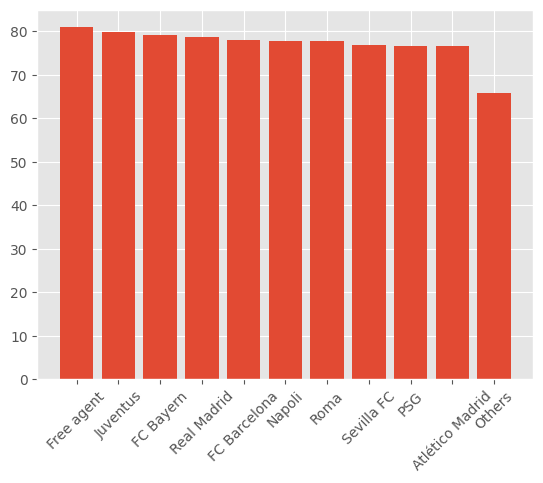

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

top_avg_teams = fifa_df.groupBy('Club').avg("Rating").sort(col("avg(Rating)").desc()).toPandas()
others = [top_avg_teams['avg(Rating)'][10:].mean()]

plt.bar(top_avg_teams['Club'][:10].tolist()+['Others'],top_avg_teams['avg(Rating)'][:10].tolist()+others)
plt.xticks(rotation = 45)
plt.show()

* **Pie's Chart**

In this case we are going to represent the same information but on a Pie's chart.

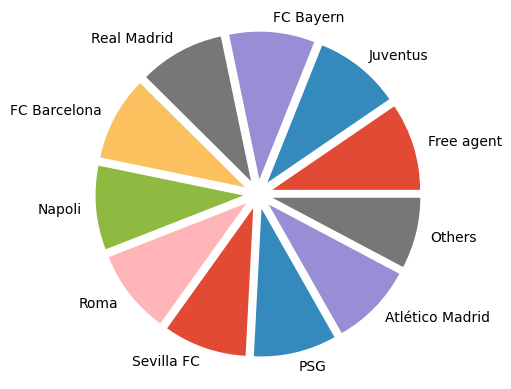

In [38]:
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(x=top_avg_teams['avg(Rating)'][:10].tolist()+others,
        labels=top_avg_teams['Club'][:10].tolist()+['Others'],
        explode=explode)
plt.show()

* **Boxplot Figure**

For the next items we are going to reduce to FC Barcelona team, filtering just those players. We are going to use the library Seaborn, for mathematical statistics. We will analyze in particular the 'Rating' column.

In [39]:
fc_barcelona = fifa_df.where(fifa_df.Club == 'FC Barcelona')
fc_barcelona.show(3)

+------------+-----------+-----------------+------------+------------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|        Name|Nationality|National_Position|National_Kit|        Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Acceleratio

<Axes: xlabel='Rating'>

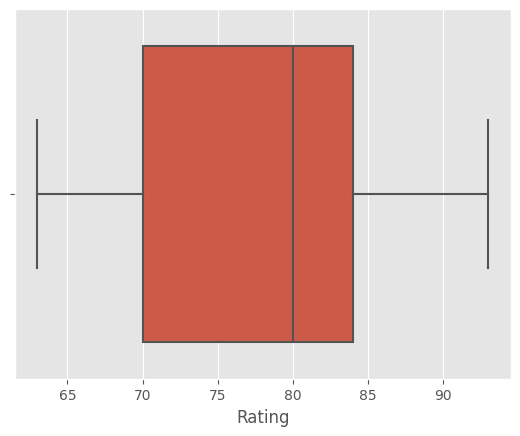

In [40]:
import seaborn as sns

fc_barcelona_df = fc_barcelona.toPandas()
sns.boxplot(x=fc_barcelona_df['Rating'])

We can filter by field position, this way we know the balance of the team and which position should be reinforced.

<Axes: xlabel='Rating', ylabel='Club_Position'>

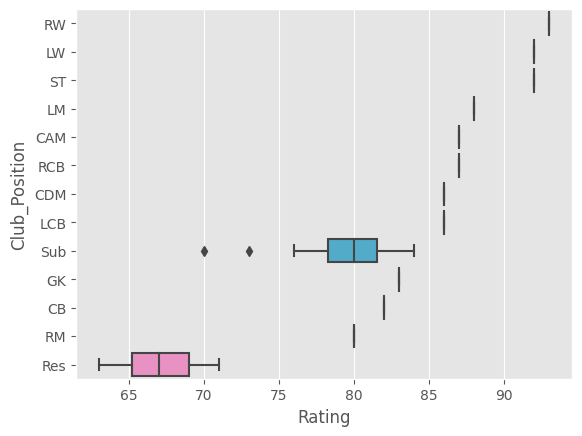

In [41]:
sns.boxplot(x=fc_barcelona_df['Rating'],y=fc_barcelona_df['Club_Position'])

* **Density Plot**

A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable. Let´s see the probability of getting any average rating.

<Axes: ylabel='Density'>

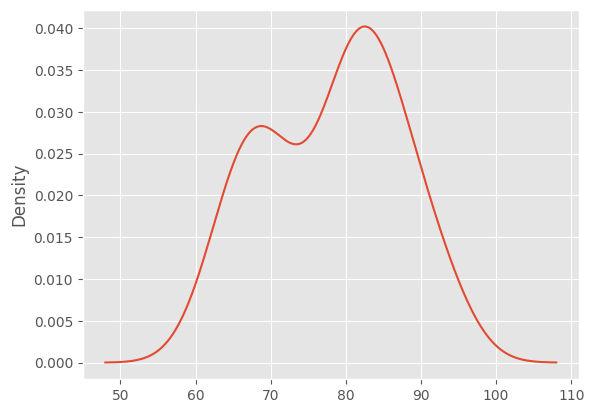

In [42]:
fc_barcelona_df['Rating'].plot.density()

* **Distribution plot**

Distribution plot is almost the same as density plot, but the *y* ax represents the frecuency of eachaverage rating. We actually get the density plot from the distribution plot.

<Axes: ylabel='Frequency'>

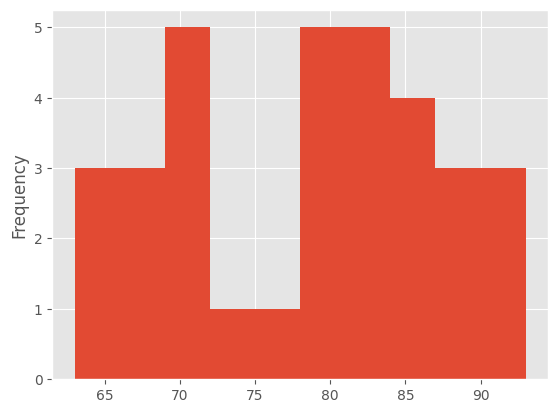

In [43]:
fc_barcelona_df['Rating'].plot.hist()

* **Correlation Matrix**

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. We will choose just a few skills, if not the running time would be too high.

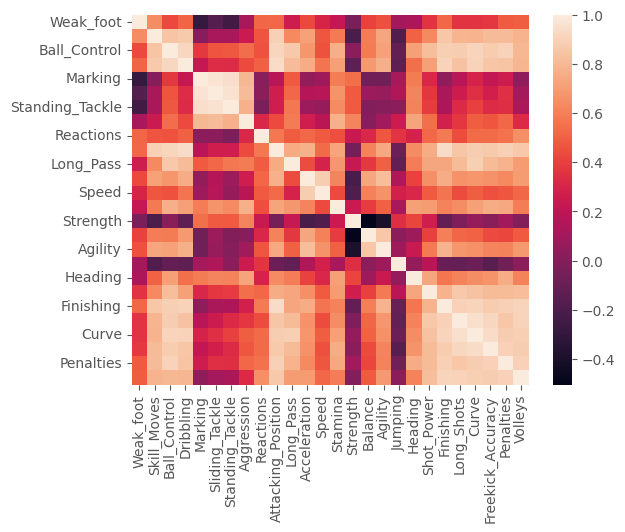

In [44]:
skills = ['Weak_foot', 'Skill_Moves','Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
          'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
          'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
          'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
          'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']

corr_matrix = fc_barcelona_df[skills].corr()
sns.heatmap(corr_matrix);

Let´s see the point cloud and distribution plot among several skills.

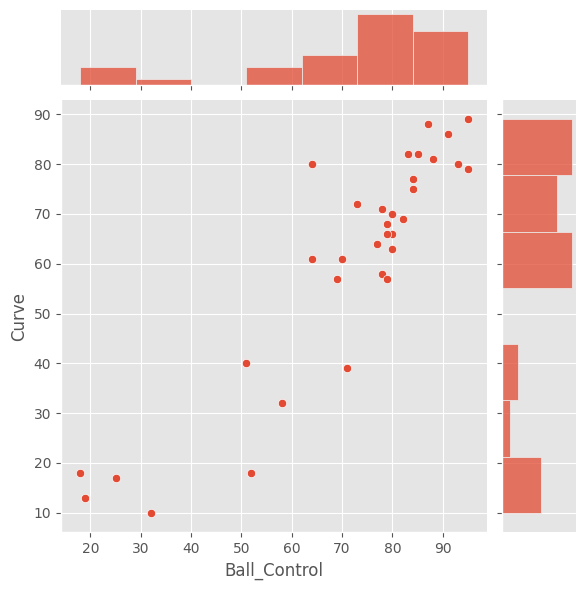

In [45]:
sns.jointplot(x='Ball_Control', y='Curve',
              data=fc_barcelona_df, kind='scatter');

In [46]:
skills_reduced = ['Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength']

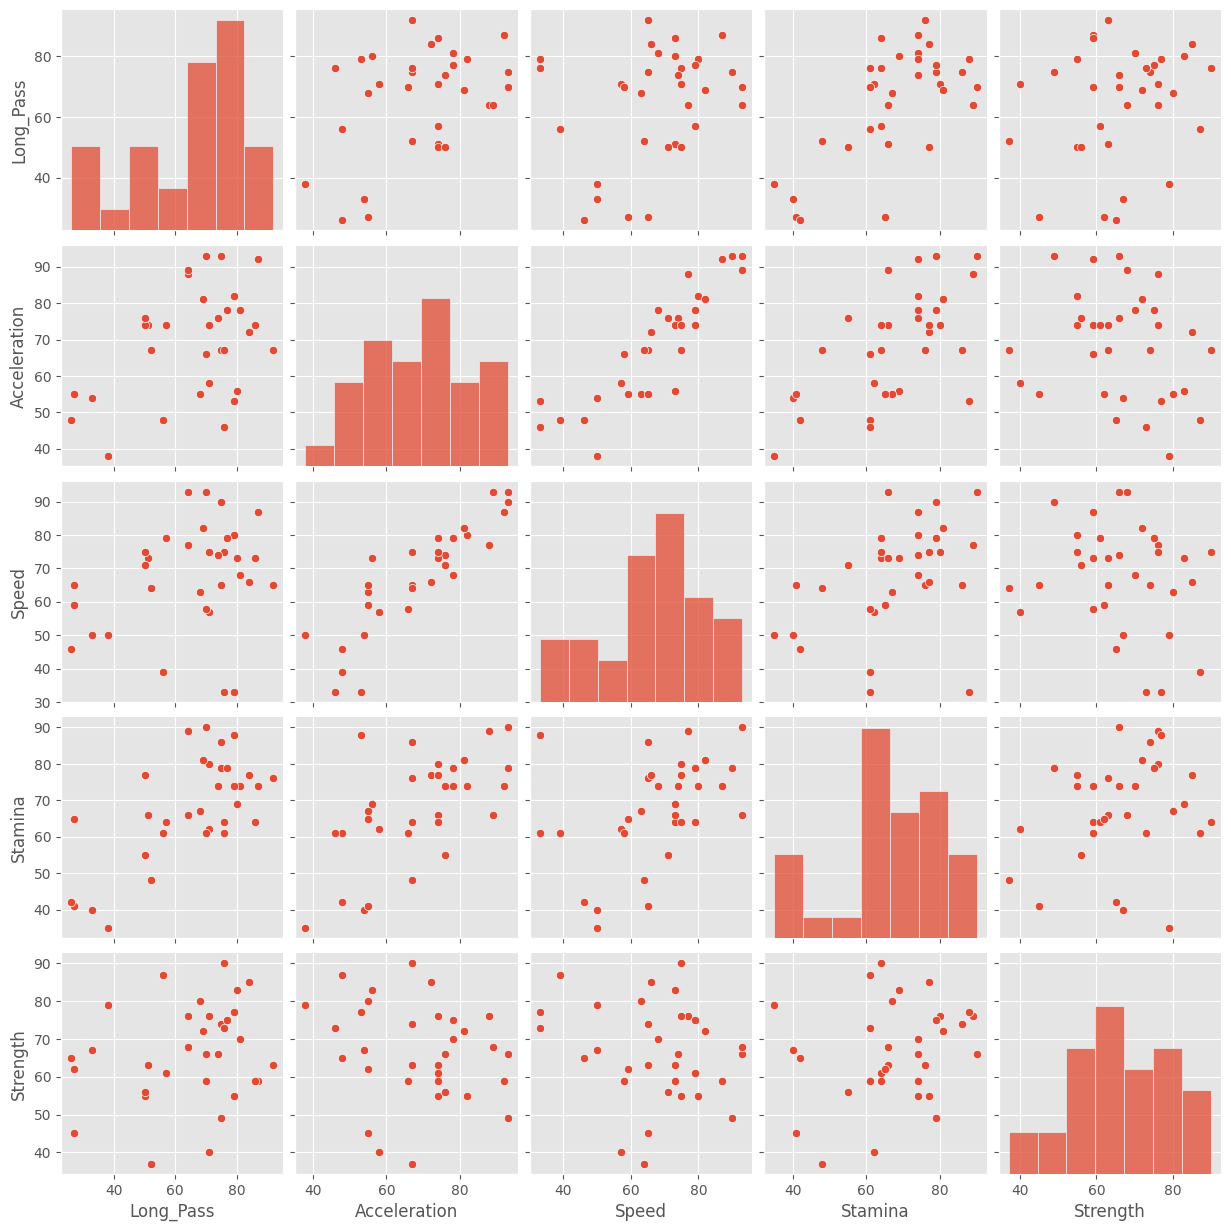

In [47]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(fc_barcelona_df[skills_reduced]);

### 4. Machine Learning

For Machine Learning, we are going to use MLlib, which is Spark’s library. Its goal is to make practical machine learning scalable and easy. At a high level, it provides tools such as:

* ML Algorithms: common learning algorithms such as classification, regression, clustering, and collaborative filtering
* Featurization: feature extraction, transformation, dimensionality reduction, and selection
* Pipelines: tools for constructing, evaluating, and tuning ML Pipelines
* Persistence: saving and load algorithms, models, and Pipelines
* Utilities: linear algebra, statistics, data handling, etc.

#### **Exercise 1**
Imagine you are a Data Scientist for FC Barcelona. PSG has made an offert for the football player Neymar, and he has already accepted. The team manager is asking for your support trying to supply the vacant, and find the player that fits better to Neymar's position. Your work consist of filtering the database, and generating a Machine Learning model to predict the best option. For that you must follow the next steps:
* Find which role plays in FC Barcelona the player Neymar.
* Select the available players in other teams. As FC Barcelona has a large budget, you are able to sign any player in the database. We recommend you to have several options, for just in case there is no agreement with the first player you consider to contract.
* FC Barcelona is quite prestigious, every player in your list should be rated over 75.
* Now it is time to compare football players. The best option is the one more similar to Neymar. For that, cluster football players and take the final list nearest to Neymar habilities and ratings. Although there are several clustering techniques, we are going to classify the football players using Kmeans. In order to choose the number of clusters the Silhouette score will be the chosen metric iterated over 2 to 10 clusters.



1. Find wich role plays in FC Barcelona the football player Neymar, selecting the column 'Club_Position' where the necessary conditions.

In [48]:
fifa_df.select('Club_Position').where((fifa_df.Club == "FC Barcelona") & (fifa_df.Name == "Neymar")).show()
position =fifa_df.select('Club_Position').where((fifa_df.Club == "FC Barcelona") & (fifa_df.Name == "Neymar")).collect()[0]['Club_Position']

+-------------+
|Club_Position|
+-------------+
|           LW|
+-------------+



Once we know Neymar plays in 'LW' position (Left Wing), our aim will consist of looking for the football player wich better fits in the team.

2. Create a table with *select* statement (not really creation, just display) with the available players to be chosen.

In [49]:
available_players_without_ney = fifa_df.where((fifa_df.Club_Position == position) & (fifa_df.Name != "Neymar"))
available_players = fifa_df.where(fifa_df.Club_Position == position)
available_players_without_ney.show(3)

+-----------------+-----------+-----------------+------------+-------------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|             Name|Nationality|National_Position|National_Kit|         Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass

3. Filter the database with column 'Rating' over 75.

In [50]:
available_players_filtered = available_players.where(available_players.Rating >= 75)
available_players_filtered.show(3)

+-----------------+-----------+-----------------+------------+------------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+-------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|             Name|Nationality|National_Position|National_Kit|        Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|    Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Accel

4. Between the new available players after applying the filter, we must choose the perfect one.

* Principal Component Analysis for visualizing the skills in just two dimensions. The chosen skills will be: 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'. Notice that we can also select the 'Name' column as label.

In [51]:
col_names = ['Name', 'Work_Rate', 'Skill_Moves', 'Ball_Control',
                                         'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
                                         'Aggression', 'Reactions', 'Attacking_Position', 'Interceptions',
                                         'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass',
                                         'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
                                         'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
                                         'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']

PCA_dataset = available_players_filtered.select(*col_names)
PCA_dataset.show(3)

+-----------------+-------------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+
|             Name|    Work_Rate|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Acceleration|Speed|Stamina|Strength|Balance|Agility|Jumping|Heading|Shot_Power|Finishing|Long_Shots|Curve|Freekick_Accuracy|Penalties|Volleys|
+-----------------+-------------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+-

Notice the variable 'Work_Rate' is categorical, and not numerical. First of all, we must convert to int categories. The simplest transformation could be the next one:

* High / Low      ---> 1

* High / Medium   ---> 2

* Medium / Medium ---> 3

* High / High     ---> 4

* High / Low      ---> 5

* ...

Although this transformation does not keep the order, the best one should be High / Low ---> (3, 1) and totally ordered, then splitted into two columns, that is enough for what we want to see.

In [52]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Work_Rate", outputCol="Work_Rate_numerical")
indexed = indexer.fit(PCA_dataset).transform(PCA_dataset)
indexed = indexed.drop('Work_Rate')
indexed.show(3)

+-----------------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+-------------------+
|             Name|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Acceleration|Speed|Stamina|Strength|Balance|Agility|Jumping|Heading|Shot_Power|Finishing|Long_Shots|Curve|Freekick_Accuracy|Penalties|Volleys|Work_Rate_numerical|
+-----------------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+---

There are numerous tools for performing machine learning on a single-machine, and while there are several great options to choose from, these single machine tools do have their limits either in terms of the size of data you can train on or the processing time. This means single-machine tools (*Scikit*, *TensorFlow*) are complementary  tools, not competitive ones. When you hit those scalability issues, take advantage of Spark’s abilities.

There are two key use cases where you want to leverage Spark’s ability to scale. Firstly, you want to leverage Spark for preprocessing and feature generation to reduce the amount of time it might take to produce training and test sets from a large amount of data. Then you might leverage single-machine learning algorithms to train on those given data sets. Secondly, when your input data or model size become too difficult or inconvenient to put on one machine, use Spark to do the heavy lifting. Spark makes big data machine learning simple.

As we are simultaing working with an extra-large dataset, we are going to use the *pyspark.ml* submodule. In this case, to attempt the PCA and the Kmeans clustering technique.

**PCA**
* Assembling skill columns in one Vector column (features). This way every transformation will update just one column.
* For performing PCA we need to standardize and normalize data. In particular, standardization is often used because our aim is to maximize variance while reducing dimensionality. Normalization is performed bacuase we are not sure of our data distribution.

In [53]:
from pyspark.ml.feature import VectorAssembler, Normalizer, StandardScaler, PCA

# Vector assembler
vecAssembler = VectorAssembler(inputCols=indexed.columns[1:], outputCol="features", handleInvalid="keep")
PCA_dataset = vecAssembler.transform(indexed).select("Name", "features")

# StandardScaler
standardScaler = StandardScaler()
standardScaler.setInputCol("features")
standardScaler.setOutputCol("features_stand")
model = standardScaler.fit(PCA_dataset)
PCA_dataset = model.transform(PCA_dataset)

# Normalizer
normalizer = Normalizer(p=1.0)
normalizer.setInputCol("features")
normalizer.setOutputCol("features_norm")
PCA_dataset = normalizer.transform(PCA_dataset)

# PCA transform
pca = PCA(k=12, inputCol="features_norm")
pca.setOutputCol("PCA")
model = pca.fit(PCA_dataset)
df_PCA = model.transform(PCA_dataset)

In [54]:
# Gets minimum number of components to reach min explained variance (90%)
def num_PCA(varianzas_individuales, min=0.9):
    indice = 0
    sum_total = 0
    for varianza in varianzas_individuales:
        sum_total = sum_total + varianza
        indice = indice + 1
        if sum_total > min:
            break
    return indice

# Plots PCA cumulative sum and individual explained variances
def plot_PCA(var_indiv, var_acum):
    plt.bar(range(0,len(var_indiv)), var_indiv, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(var_indiv)), var_acum, where='mid',label='Cumulative explained vairance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

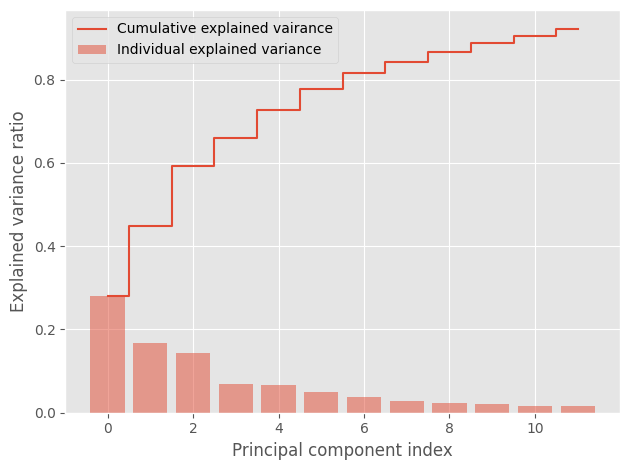

Number of PCA (90%):  11  components


In [55]:
import numpy as np

plot_PCA(model.explainedVariance, np.cumsum(model.explainedVariance))
print('Number of PCA (90%): ', num_PCA(model.explainedVariance), ' components')

**Clustering**

Clustering or Cluster analysis is the method of grouping the entities based on similarities. Defined as an unsupervised learning problem that aims to make training data with a given set of inputs but without any target values. It is the process of finding similar structures in a set of unlabeled data to make it more understandable and manipulative.

It reveals subgroups in the available heterogeneous datasets such that every individual cluster has greater homogeneity than the whole. In simpler words, these clusters are groups of like objects that differ from the objects in other clusters.

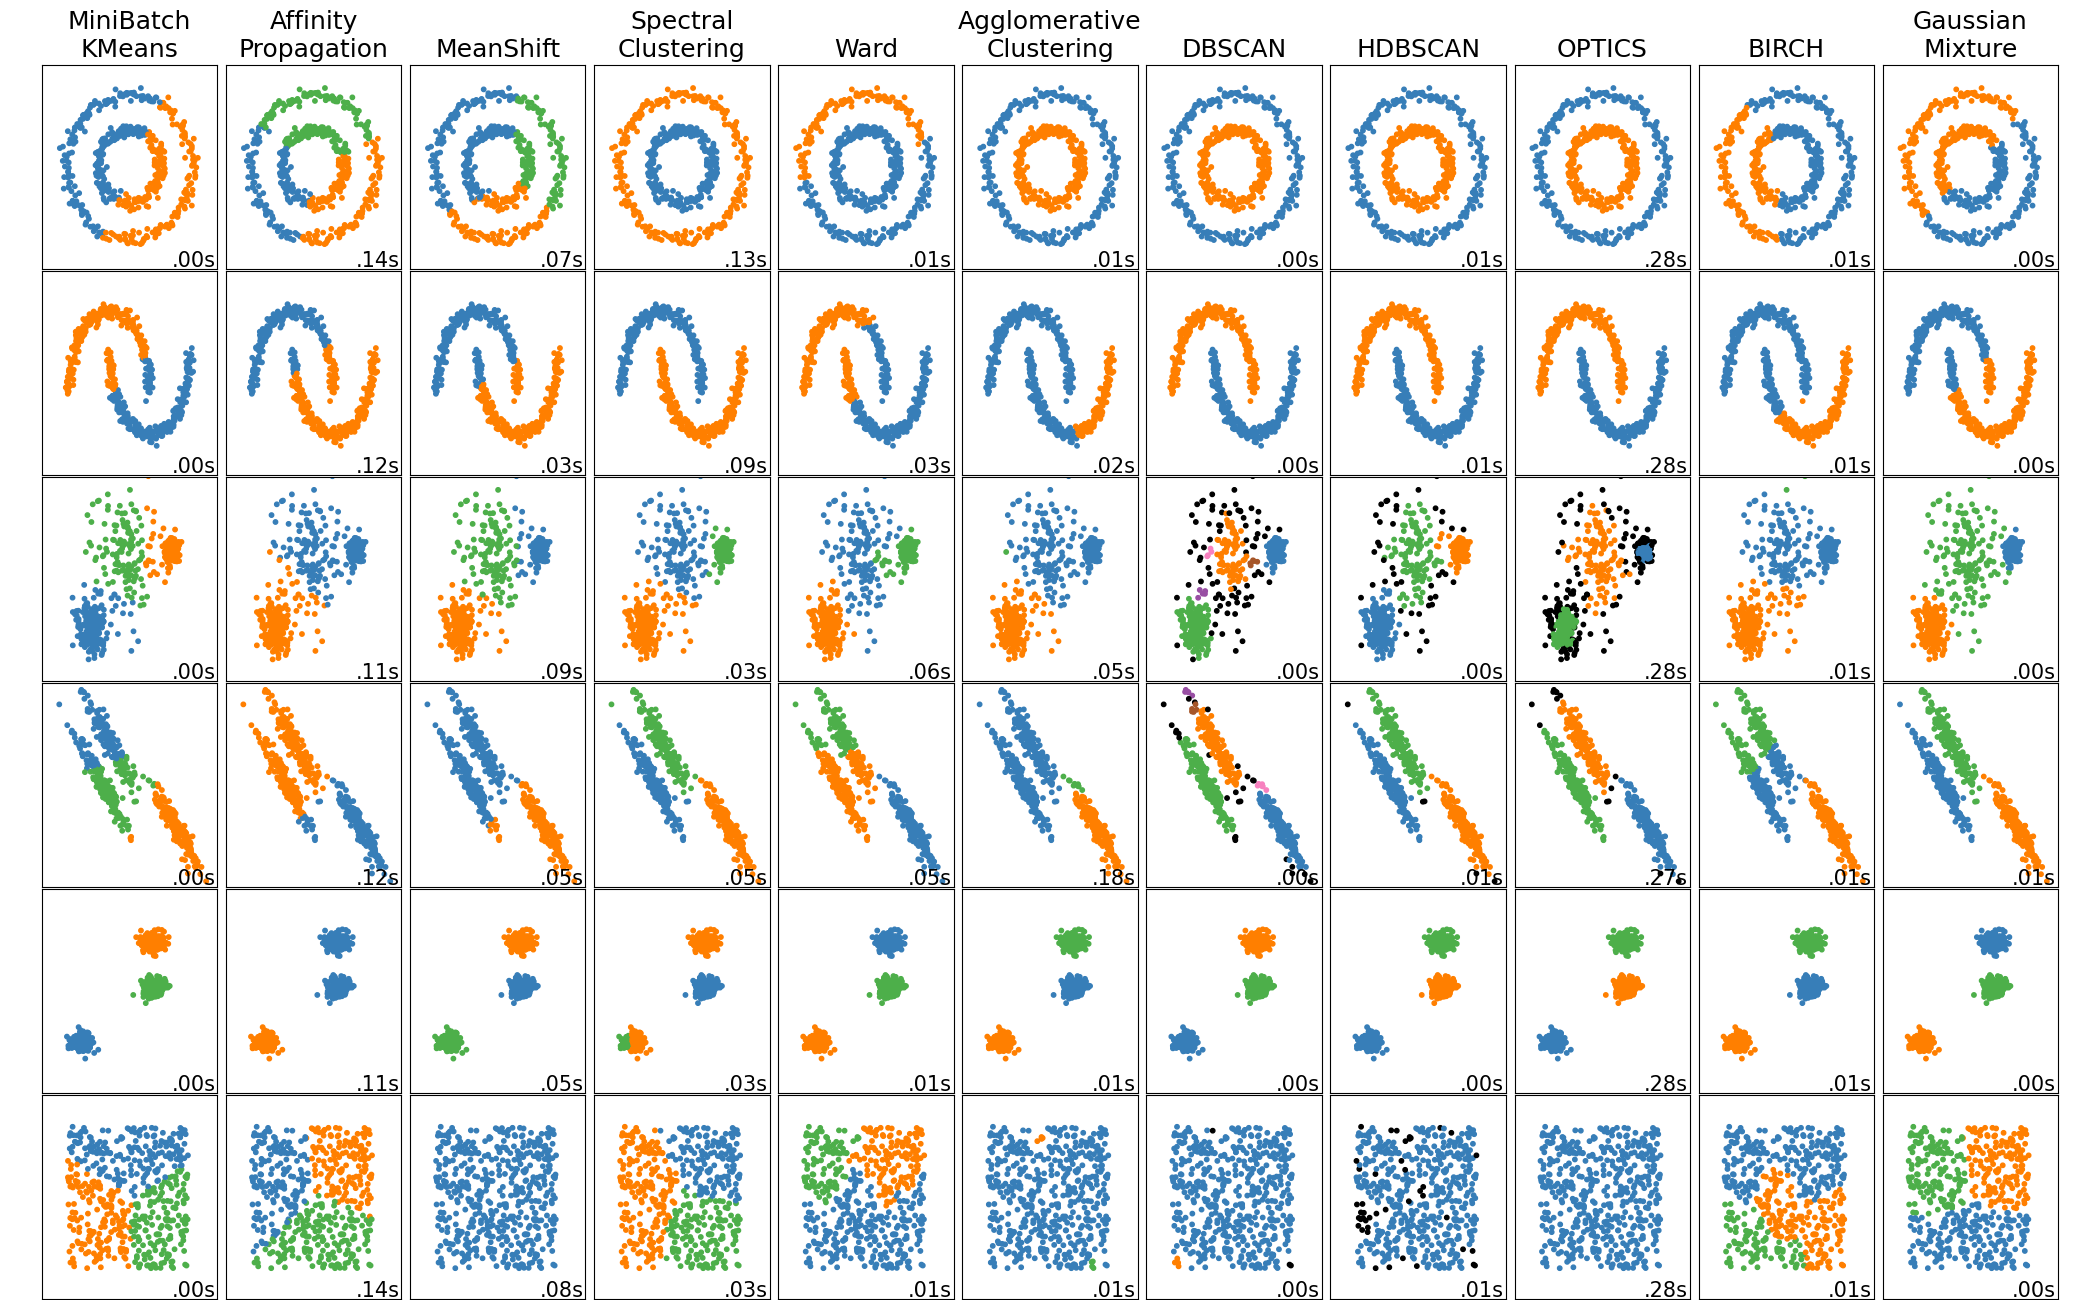

**Kmeans** explanation:

* Specify number of clusters K.
* Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
* Compute the sum of the squared distance between data points and all centroids.
Assign each data point to the closest cluster (centroid).
* Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

In [56]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

distortions = []

for i in range(2,10):
    KMeans_algo = KMeans(featuresCol='features_norm', k=i)
    KMeans_fit = KMeans_algo.fit(df_PCA)
    output=KMeans_fit.transform(df_PCA)

    evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features_norm', metricName='silhouette', distanceMeasure='squaredEuclidean')
    score=evaluator.evaluate(output)
    distortions.append(score)


**Silhouette score**

The silhouette score is a measure of how well a data point belongs to its assigned cluster and how far it is from the neighboring clusters. It ranges from -1 to 1, where a score closer to 1 indicates that the data point is well-clustered, and a score closer to -1 indicates that the data point is misclassified and should belong to a neighboring cluster. A score of 0 indicates that the data point is on the boundary between two clusters.

The silhouette score is calculated for each data point in the dataset and then averaged to get the mean silhouette score for the entire dataset. The higher the mean silhouette score, the better the clustering.

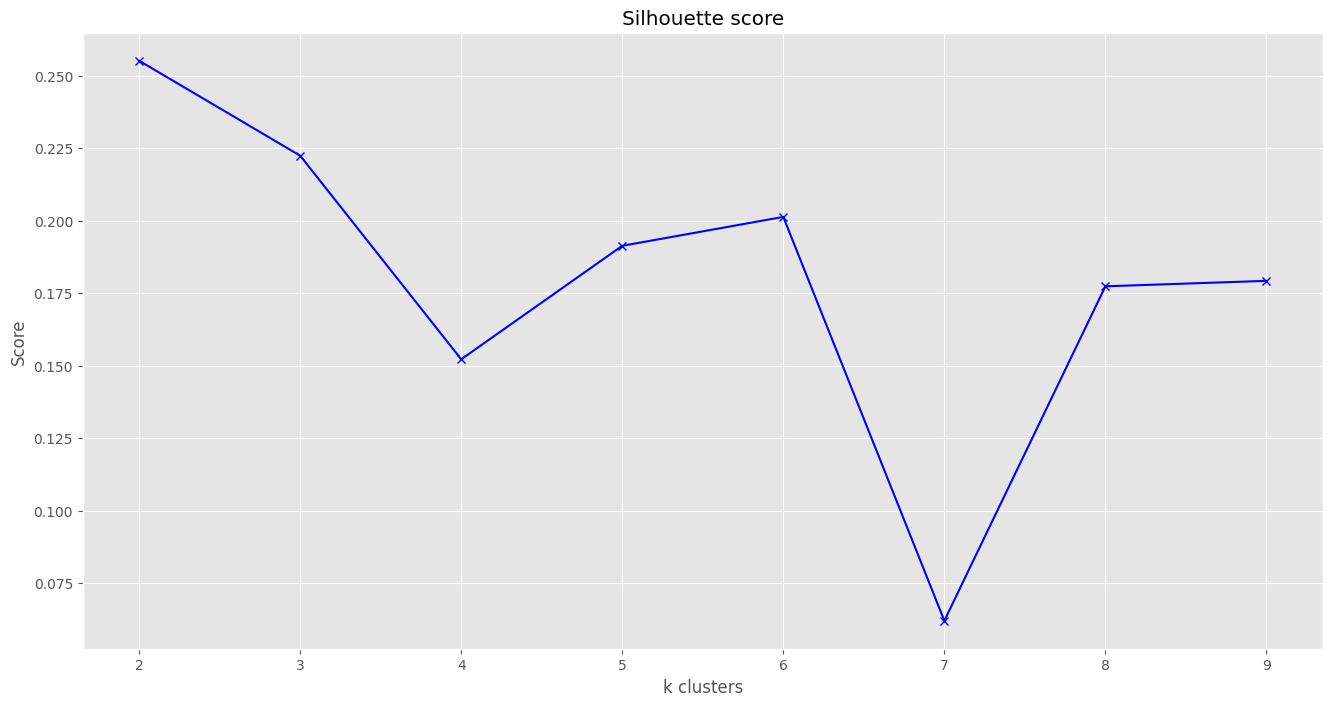

In [57]:
K = range(2,10)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Score')
plt.title('Silhouette score')
plt.show()

The most appropiate number of clusters is the highest distance in the Silhouette score. Although we are not so instered in the number of clusters, we just want the closest (most similarly skilled) players. Then we will get a high number of clusters than recommended, for example 6, and this way the final list is more filtered.

In [58]:
KMeans_algo = KMeans(featuresCol='features_norm', k=6)
KMeans_fit = KMeans_algo.fit(df_PCA)
output=KMeans_fit.transform(df_PCA)
output.show()

+-----------------+--------------------+--------------------+--------------------+--------------------+----------+
|             Name|            features|      features_stand|       features_norm|                 PCA|prediction|
+-----------------+--------------------+--------------------+--------------------+--------------------+----------+
|Cristiano Ronaldo|[5.0,93.0,92.0,22...|[8.70373675825773...|[0.00221533008418...|[-0.0407422882600...|         3|
|           Neymar|[5.0,95.0,96.0,21...|[8.70373675825773...|[0.00236071765816...|[-0.0504915067471...|         0|
|      Eden Hazard|[4.0,91.0,93.0,25...|[6.96298940660619...|[0.00187705302674...|[-0.0488776560375...|         0|
|       Marco Reus|[4.0,85.0,86.0,30...|[6.96298940660619...|[0.00182481751824...|[-0.0389124703632...|         3|
|         Coutinho|[4.0,88.0,88.0,24...|[6.96298940660619...|[0.00192400192400...|[-0.0442065116215...|         0|
|    Dimitri Payet|[4.0,90.0,89.0,29...|[6.96298940660619...|[0.00189573459715..

Let´s see what cluster is assigned to Neymar.

In [59]:
output.select("prediction").where(output.Name == "Neymar").show()
cluster = output.select("prediction").where(output.Name == "Neymar").collect()[0]['prediction']

+----------+
|prediction|
+----------+
|         0|
+----------+



Finally let´s filter the players who share cluster with Neymar, and now we have got the final player's list.

In [60]:
output.select("Name").where((output.prediction == cluster) & (output.Name != "Neymar")).show()

+---------------+
|           Name|
+---------------+
|    Eden Hazard|
|       Coutinho|
|Lorenzo Insigne|
|           Nani|
|       Deulofeu|
|    Adem Ljajić|
|      Oyarzabal|
|  Theo Bongonda|
|    Amin Younes|
|Oussama Assaidi|
|    Floyd Ayité|
+---------------+



Now we get all the player's skills to finish the report.

In [61]:
l = output.select("Name").where((output.prediction == cluster) & (output.Name != "Neymar")).collect()
final_list = [elem['Name'] for elem in l]
del l

In [62]:
fifa_df.filter(fifa_df.Name.isin(final_list)).show()

+---------------+-----------+-----------------+------------+-------------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|           Name|Nationality|National_Position|National_Kit|         Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Acc

#### **Exercise 2**

Hiring first candidates in you player list has finally been impossible. Consequently, the first team manager Luis Enrique Martínez is angry with the FC Barcelona directive and has decided to leave the club. Among other offerts, the most interesting for Luis Enrique is FC Bayern Munich, that is really interested in hiring him as a new manager.  

As a data scientist, you must contribute essential information about the FC Bayern to conclude wether Luis Enrique should go there or not. After several reports, we know that the club fits perfectly with ball possesion and its way to play. FC Bayern is a quite known team, so the player´s level is appropiate for Luis Enrique. Finally, what we want to know is the rating balance.

We assume the average rating is similar to FC Barcelona, but it is necessary to analyze if the balance and rechanges have the quality for such a long football term, in which Bayern opts to win its national league and coupe, and the Champions trophee. The way we are going to do it is comparing the rating density/distribution of both football teams.

In [63]:
fc_bayern = fifa_df.where(fifa_df.Club == 'FC Bayern')
fc_bayern.show(3)
fc_bayern_df = fc_bayern.toPandas()

+------------------+-----------+-----------------+------------+---------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|              Name|Nationality|National_Position|National_Kit|     Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Accel

Let´s see the density plot of both teams.

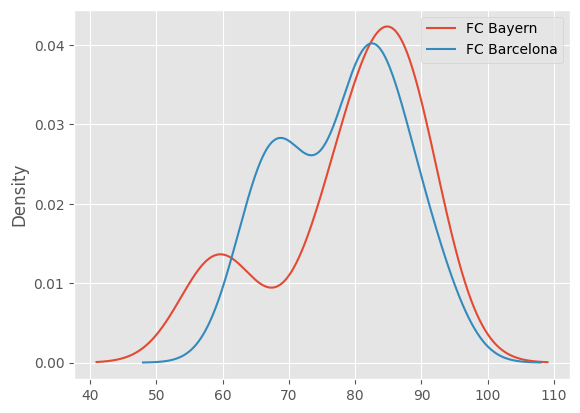

In [64]:
fc_bayern_df['Rating'].plot.density(label='FC Bayern')
fc_barcelona_df['Rating'].plot.density(label='FC Barcelona')
plt.legend()

In [65]:
print('FC Bayern median rating: ' ,fc_bayern_df['Rating'].median())
print('FC Barcelona median rating: ' ,fc_barcelona_df['Rating'].median())

FC Bayern median rating:  83.0
FC Barcelona median rating:  80.0


We can see both medians are similar, a little better the FC Bayern Munich, but it seems that the second mode is much lower in the FC Bayen case. For that, we are going to perform the Kolmogorov-Smirnov contrast test. It measures the distance between both accumulated distributions, and gives as a result wether they are similar or not.

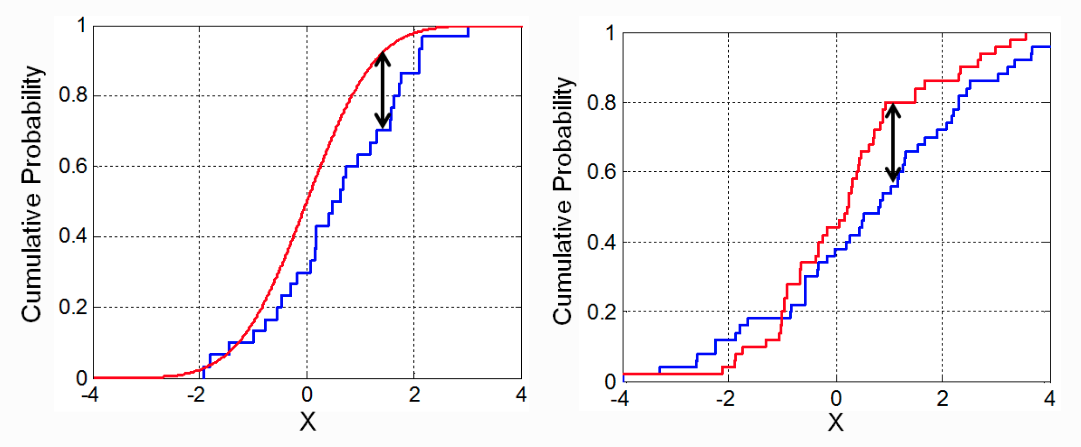

As we have filtered the dataset the most efficient option is performing the Kolmogorov-Smirnov test with the library *scipy.stats*. Although in case of a large amount of data, the solution would be with Apache Spark´s library. We will see how to do it later.


In [66]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp

In [67]:
ecdf_fcbayern = ECDF(fc_bayern_df['Rating'])
ecdf_fcbarcelona = ECDF(fc_barcelona_df['Rating'])

In [68]:
min_grid = min(fc_bayern_df['Rating'].min(),fc_barcelona_df['Rating'].min())
max_grid = max(fc_bayern_df['Rating'].max(),fc_barcelona_df['Rating'].max())
grid = range(min_grid-2,max_grid+2)
acc_prob_ecdf_fcbayern = ecdf_fcbayern(grid)
acc_prob_ecdf_fcbarcelona = ecdf_fcbarcelona(grid)

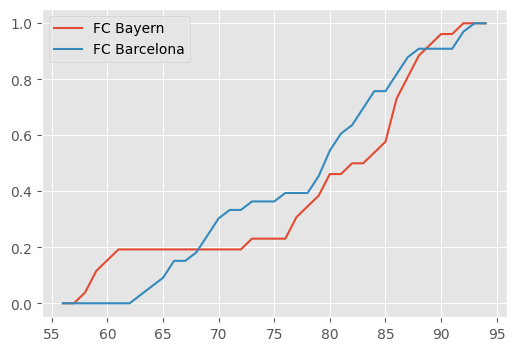

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(grid, acc_prob_ecdf_fcbayern, label='FC Bayern')
ax.plot(grid, acc_prob_ecdf_fcbarcelona, label='FC Barcelona')
ax.legend();

Let´s calculate the K-S distance.

In [70]:
abs_dif = np.abs(acc_prob_ecdf_fcbayern - acc_prob_ecdf_fcbarcelona)
distance_ks = np.max(abs_dif)
print(f"Distance Kolmogorov–Smirnov: {distance_ks :.4f}")

Distance Kolmogorov–Smirnov: 0.2191


Let´s see if the contrast considers both teams similarly rated.

In [71]:
ks_2samp(
    fc_bayern_df['Rating'],
    fc_barcelona_df['Rating']
)

KstestResult(statistic=0.2191142191142191, pvalue=0.4095230699165908, statistic_location=84, statistic_sign=-1)

Now we perform the Kolmogorov-Smirnov test with *pyspark.ml.stat*.

In [76]:
windowSpec  = Window.orderBy("Rating")

from pyspark.sql.functions import cume_dist
fc_bayern.withColumn("cume_dist",cume_dist().over(windowSpec)) \
   .show()

+--------------+-----------+-----------------+------------+---------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+--------------------+
|          Name|Nationality|National_Position|National_Kit|     Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Lo

In [94]:
from pyspark.ml.stat import KolmogorovSmirnovTest

ksResult = KolmogorovSmirnovTest.test(mixed_data, 'Rating_FCBar', 'Rating_FCBay', 0.0, 1.0).first()
ksResult

Py4JJavaError: ignored

We finally reject the null hypothesis, due to the p-value is over 0.05. Both teams are not similar, if Luis Enrique wants to go to FC Bayern and fight for every competition, he should think of several signings. Can we give him any recommendation?

In [72]:
print('FC Bayern Munich: ', len(fc_bayern_df['Rating']), ' players')
print('FC Barcelona: ', len(fc_barcelona_df['Rating']), ' players')

FC Bayern Munich:  26  players
FC Barcelona:  33  players


As we can see FC Barcelona has more players contracted, then our advice could be what players should leave FC Bayern. For that, we are going to perform outliers detection, and this way find what players are under the minimum rating we demand (outliers). Let´s see how we can perform outliers detection.

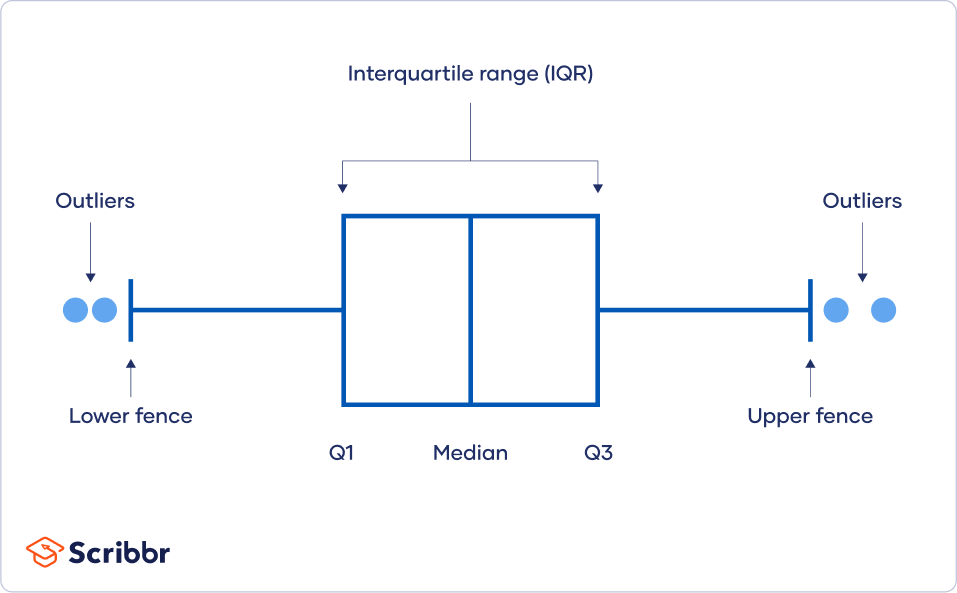

So let´s calculate the lower fence in our case, the FC Bayern players.

<Axes: xlabel='Rating'>

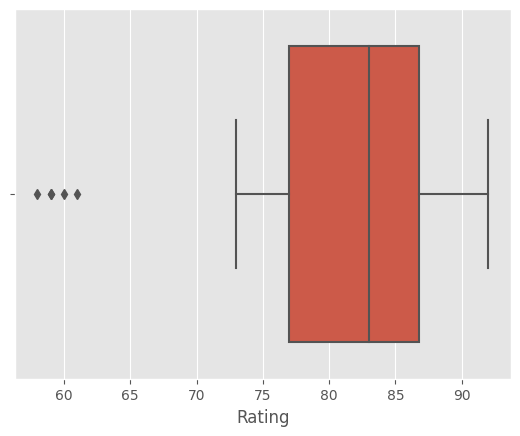

In [73]:
sns.boxplot(x=fc_bayern_df['Rating'])

In [74]:
Q1 = fc_bayern_df['Rating'].quantile(0.3)
Q3 = fc_bayern_df['Rating'].quantile(0.7)
IQR = Q3 - Q1
Lower_fence = Q1 - (1.5 * IQR)

In [75]:
fc_bayern_outs = fc_bayern.filter(fc_bayern.Rating <= Lower_fence)
fc_bayern_outs.show(3)

+------------+-----------+-----------------+------------+---------+-------------+--------+------------+---------------+------+------+------+--------------+----------+---+------------------+---------------+---------+-----------+------------+---------+-------+--------------+---------------+----------+---------+------------------+-------------+------+---------+--------+----------+---------+------------+-----+-------+--------+-------+-------+-------+-------+----------+---------+----------+-----+-----------------+---------+-------+--------------+---------+----------+-----------+-----------+
|        Name|Nationality|National_Position|National_Kit|     Club|Club_Position|Club_Kit|Club_Joining|Contract_Expiry|Rating|Height|Weight|Preffered_Foot|Birth_Date|Age|Preffered_Position|      Work_Rate|Weak_foot|Skill_Moves|Ball_Control|Dribbling|Marking|Sliding_Tackle|Standing_Tackle|Aggression|Reactions|Attacking_Position|Interceptions|Vision|Composure|Crossing|Short_Pass|Long_Pass|Acceleration|Spee

In conclusion, that is the list of players that should leave the team, in order to hire new players and rise the rating distribution.

### 5. Documentation

We recommend visiting the next sources for further information:

* [https://spark.apache.org/docs/latest/api/python/index.html](https://spark.apache.org/docs/latest/api/python/index.html)
* [https://sparkbyexamples.com/pyspark-tutorial/](https://sparkbyexamples.com/pyspark-tutorial/)



### 6. References

[1] [Udacity: Data Engineer Nanodegree](https://www.udacity.com/course/data-engineer-nanodegree--nd027?gclid=CjwKCAjwrranBhAEEiwAzbhNtWNuoqrgp10cpxGR83B9ZhKLR_j0EBx6gSDXISPxaZ3PKWulrSQHchoC2VcQAvD_BwE&utm_campaign=19167921312_c_individuals&utm_keyword=udacity%20data%20engineering_e&utm_medium=ads_r&utm_source=gsem_brand&utm_term=143524475719)

[2] [Kaggle: Advanced PySpark for Exploratory Data Analysis](https://www.kaggle.com/code/tientd95/advanced-pyspark-for-exploratory-data-analysis/notebook#5.-Explolatory-Data-analysis-)

[3] [Data Analysis: What is Data Analytics?](https://careerfoundry.com/en/blog/data-analytics/what-is-data-analytics/?utm_campaign=156497489670&utm_term=what%20is%20data%20analytics&utm_source=google&utm_medium=cpc&utm_content=670526673808&hsa_acc=9974869296&hsa_cam=6806097117&hsa_grp=156497489670&hsa_ad=670526673808&hsa_src=g&hsa_tgt=kwd-29089410432&hsa_kw=what%20is%20data%20analytics&hsa_mt=p&hsa_net=adwords&hsa_ver=3&gclid=CjwKCAjwrranBhAEEiwAzbhNtRWWrYfq6uDNetxWoMAI_yNrVJXhc9_UqUiixvCEtnSug0ujhcVd5BoC4jYQAvD_BwE)

[4] [K Means: Algorithm, Applications, Evaluation Methods, and Drawbacks](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)

[5] [How to Use Silhouette Score in K-Means](https://saturncloud.io/blog/how-to-use-silhouette-score-in-kmeans-clustering-from-scikitlearn-library/#:~:text=The%20silhouette%20score%20is%20a%20useful%20metric%20for%20evaluating%20the,is%20from%20the%20neighboring%20clusters.)

[6] [Scikit-Learn Documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)



---

